# **Phase Four Project Submission**

#### **Student Name: Millicent Cheptoi**
#### **Student Pace: Part-time**
#### **Scheduled Project Submission Date: 12/2/2025**
#### **Instructors name : Samuel Karu**
#### **Blog Post URL: https://github.com/Cheptoi-Millicent/DS-PHASE4-PROJECT**

# **1. Business Understanding**

## **Problem Statement**

All entertainment websites or online stores have alot of items. It becomes challenging for the customer to select the right one. At this place, recommender systems comes into the picture and help the user to find the right item by minimizing the options.


### **Objectives**


The objectives:

1. To create a Collaborative Filtering based Movie Recommendation System.
It provides top 5 recommendations to a user, based on their ratings of other movie.
2. Predict the rating that a user would give to a movie that he has not yet rated.
3. Minimize the difference between the predicted and actual rating (RMSE and
 MAE)..

### **2. Data Collection**

The dataset has been obtained from Grouplens.

Link : https://grouplens.org/datasets/movielens/latest/

This dataset entails: 100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users and it was last updated 9/2018.

The users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files  links.csv, movies.csv, ratings.csv and tags.csv.

For our objective, we would be using "ratings.csv" and "movies.csv" data files.

In [ ]:

# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import textwrap
import warnings
import random
warnings.filterwarnings("ignore")



In [ ]:
!pip install scikit-surprise

In [ ]:
# Libraries to be used
from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBaseline
from sklearn.model_selection import train_test_split
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

### **3. Data Preparation/Preprocessing**

In [ ]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset

file_path = "/content/drive/MyDrive/Data"

movies = pd.read_csv(file_path + "/movies.csv")
# Checking the features and no. of records in the dataset

print("The number of records are : ", movies.shape[0])
print("The number of features are : ", movies.shape[1])
print("The list of features is : ", movies.columns)
movies.head()

The number of records are :  9742
The number of features are :  3
The list of features is :  Index(['movieId', 'title', 'genres'], dtype='object')


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Observations:**

1. There are 9742 records of the data.
2. There are 3 features: movieId, title and genres.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
ratings = pd.read_csv(file_path + "/ratings.csv")
# Checking the features and no. of records in the dataset

print("The number of records are : ", ratings.shape[0])
print("The number of features are : ", ratings.shape[1])
print("The list of features is : ", ratings.columns)
ratings.head()

The number of records are :  100836
The number of features are :  4
The list of features is :  Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


**Observations:**

1. There are 100836 records of the data.
2. There are 3 features: userId, movieId, rating, timestamp.

In [ ]:
#Dropping the 'timestamp column
#ratings = ratings.drop(columns=['timestamp'], axis=1)
# Checking the features and no. of records in the dataset

#print("The number of records are : ", ratings.shape[0])
#print("The number of features are : ", ratings.shape[1])
#print("The list of features is : ", ratings.columns)
#ratings.head()

**Observations:**

1. There are 100836 records of the data.
2. There are 3 features: userId, movieId, rating.
3. Dropped timestamp since we'll not need in the project,

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### **Merge Datasets**

We merge the `ratings` with `movies` to include movie titles in the ratings dataset.

In [ ]:
import pandas as pd

# Load both datasets
movies = pd.read_csv(file_path + "/movies.csv")  # First dataset
ratings = pd.read_csv(file_path + "/ratings.csv")  # Second dataset

# Merge datasets (Adjust the merging key as needed)
merged_data = pd.merge(movies, ratings, on="movieId", how="inner")  # Use 'outer' if you want all records

# Ensure the merged dataset has at least 50,000 records
if len(merged_data) >= 50000:
    data = merged_data.sample(n=50000, random_state=42)  # Randomly sample 50,000 records
else:
    print("Merged dataset has fewer than 50,000 records. Using the entire dataset.")
    data = merged_data  # Use full dataset if it's smaller than 50,000

# Display the sample
print("The number of records are : ", data.shape[0])
print("The number of features are : ",data.shape[1])
print("The list of features is : ", data.columns)
# Display the first few rows of the merged dataset
data.head()

The number of records are :  50000
The number of features are :  6
The list of features is :  Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')


,movieId,title,genres,userId,rating,timestamp
67037,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,599,3.0,1498525228
42175,2329,American History X (1998),Crime|Drama,282,4.5,1378495649
93850,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,282,4.0,1514068391
6187,230,Dolores Claiborne (1995),Drama|Thriller,414,3.0,961517975
12229,440,Dave (1993),Comedy|Romance,136,5.0,832449786


In [ ]:
#Dropping the 'timestamp column
time_stamp = data.drop(columns=['timestamp'], axis=1)
# Checking the features and no. of records in the dataset

print("The number of records are : ", time_stamp.shape[0])
print("The number of features are : ", time_stamp.shape[1])
print("The list of features is : ", time_stamp.columns)
time_stamp.head()

The number of records are :  50000
The number of features are :  5
The list of features is :  Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')


,movieId,title,genres,userId,rating
67037,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,599,3.0
42175,2329,American History X (1998),Crime|Drama,282,4.5
93850,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,282,4.0
6187,230,Dolores Claiborne (1995),Drama|Thriller,414,3.0
12229,440,Dave (1993),Comedy|Romance,136,5.0


### **Merge Datasets**

We merge the `ratings` with `movies` to include movie titles in the ratings dataset.

In [ ]:
#data = pd.merge(ratings, movies, on="movieId")
# Checking the features and no. of records in the dataset

##print("The number of records are : ", data.shape[0])
#print("The number of features are : ",data.shape[1])
#print("The list of features is : ", data.columns)
# Display the first few rows of the merged dataset
#data.head()

**Observations:**

1. There are  50000 records of the data.
2. There are 5 features: userId, movieId, rating,title and genres.

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.

In [ ]:
# Checking for duplicates

print("No. of duplicates records in the dataset : ",time_stamp.duplicated().sum())

No. of duplicates records in the dataset :  0


**Observations:**

1. There are no duplicate records in the dataset.

In [ ]:
# Checking the columns' titles and datatypes

time_stamp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 67037 to 29090
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  50000 non-null  int64  
 1   title    50000 non-null  object 
 2   genres   50000 non-null  object 
 3   userId   50000 non-null  int64  
 4   rating   50000 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ MB


### **3.1.1 Handling Missing Values**

Identifying the features that have some missing values and imputing them

In [ ]:
# Finding Missing Values
missing_percentage = (time_stamp.isnull().sum() / len(time_stamp)) * 100
print("Missing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 movieId    0.0
title      0.0
genres     0.0
userId     0.0
rating     0.0
dtype: float64


**Observations:**

1. It looks like that the dataset is well maintained as we do not see any missing values, which is good.

## **3.2  Exploratory Data Analysis**
After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

In [ ]:
df =time_stamp.copy()
time_stamp.head()

,movieId,title,genres,userId,rating
67037,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,599,3.0
42175,2329,American History X (1998),Crime|Drama,282,4.5
93850,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX,282,4.0
6187,230,Dolores Claiborne (1995),Drama|Thriller,414,3.0
12229,440,Dave (1993),Comedy|Romance,136,5.0


## **3.2.1 Univariate Analysis**
Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [ ]:

# Checking the feature "movieID"
total_movies = len(np.unique(df["movieId"]))
print("The count of unique movieID in the dataset is : ", total_movies)
print("The top 5 movieID in the dataset are : \n", df["movieId"].value_counts()[:5])

The count of unique movieID in the dataset is :  7521
The top 5 movieID in the dataset are : 
 movieId
318     165
356     152
593     149
296     140
2571    131
Name: count, dtype: int64


### Observations:

1. "movieId" represents the movies with at least one rating or tag in the dataset.
2. There are close to 7521 unique movies in the dataset.
3. movieId 356, 318, 296, 593, 2571are few popular movies which has been rated over 100 times.


In [ ]:
# Checking the feature "userID"

total_users = len(np.unique(ratings["userId"]))
print("The count of unique userID in the dataset is : ", total_users)
print("The top 5 userID in the dataset are : \n", ratings["userId"].value_counts()[:5])

The count of unique userID in the dataset is :  610
The top 5 userID in the dataset are : 
 userId
414    2698
599    2478
474    2108
448    1864
274    1346
Name: count, dtype: int64


**Observations:**

1. "userId" are the Users that were selected at random for inclusion and their ids have been anonymized.
2. There are 610 unique users in the dataset.
3. userId 414 has 2698 records in the dataset.

In [ ]:
# Checking the feature "title"

movie_list = df["title"].unique()
print("The count of unique title in the dataset is : ",df["title"].nunique())
print("The top 5 title in the dataset are : \n", df["title"].value_counts()[:5])

The count of unique title in the dataset is :  7517
The top 5 title in the dataset are : 
 title
Shawshank Redemption, The (1994)    165
Forrest Gump (1994)                 152
Silence of the Lambs, The (1991)    149
Pulp Fiction (1994)                 140
Matrix, The (1999)                  131
Name: count, dtype: int64


**Observations:**

1. There are   7517 unique movie titles in the dataset.
2. Pulp Fiction, Forrest Gump, Shawshank Redemption and Silence of the Lambs are the top 3 movies in terms of no. of ratings received which are over 100 for each one.

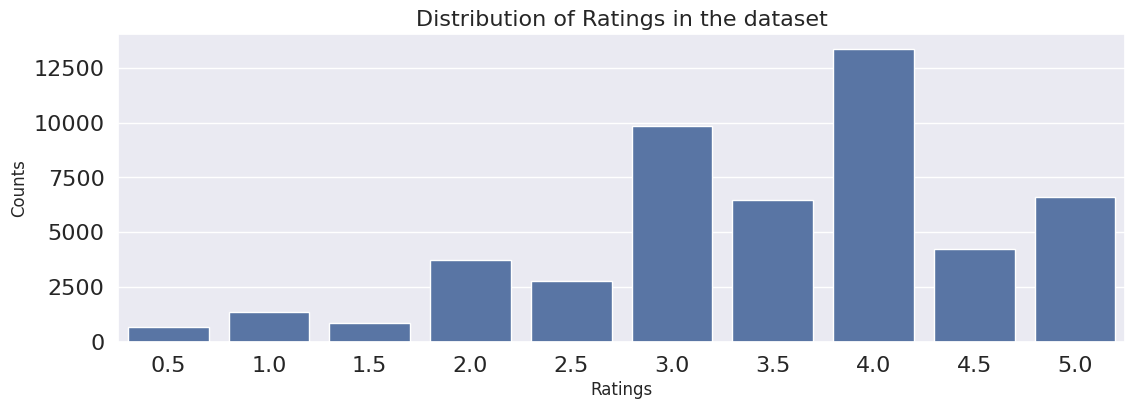

In [ ]:
##Visualizing the feature "Ratings"

sns.set(style="darkgrid")
plt.figure(figsize=(13, 4))
sns.countplot(data=df, x="rating", color='b')

plt.tick_params(labelsize = 16)
plt.title("Distribution of Ratings in the dataset", fontsize = 16)
plt.xlabel("Ratings", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.show()

### Observations:

1. The ratings given by users to movies lies in between 0.5 to 5.
2. A high proportion of the movies have been rated 3, 3.5 or 4 by the users.
3. The distribution of ratings look a bit left skewed as large proportion of ratings is in between 3 to 5.

In [ ]:
top = list(pd.DataFrame(df[df["rating"] == 5].groupby("title").count()).sort_values(by="rating", ascending=False)[:20].index)
print(top)

['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Pulp Fiction (1994)', 'Matrix, The (1999)', 'Silence of the Lambs, The (1991)', 'Star Wars: Episode IV - A New Hope (1977)', "Schindler's List (1993)", 'Usual Suspects, The (1995)', 'Fight Club (1999)', 'Godfather, The (1972)', 'Braveheart (1995)', 'Seven (a.k.a. Se7en) (1995)', 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Terminator 2: Judgment Day (1991)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Saving Private Ryan (1998)', 'Lord of the Rings: The Two Towers, The (2002)', 'American Beauty (1999)', 'Lord of the Rings: The Return of the King, The (2003)']


**Observation:**

Most of the ratings appear to be from movies made in between 1990 and 2000.

In [ ]:
def find_genres(movies_df):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

genre_counts = find_genres(df)
genre_counts

{'Action': 15210,
 'Mystery': 3858,
 'Thriller': 13103,
 'Crime': 8283,
 'Drama': 20937,
 'Adventure': 11973,
 'IMAX': 2047,
 'Comedy': 19261,
 'Romance': 8920,
 'Fantasy': 5786,
 'Animation': 3443,
 'Children': 4534,
 'Documentary': 579,
 'Film-Noir': 444,
 'Sci-Fi': 8561,
 'War': 2403,
 'Musical': 2015,
 'Horror': 3629,
 'Western': 979,
 '(no genres listed)': 18}

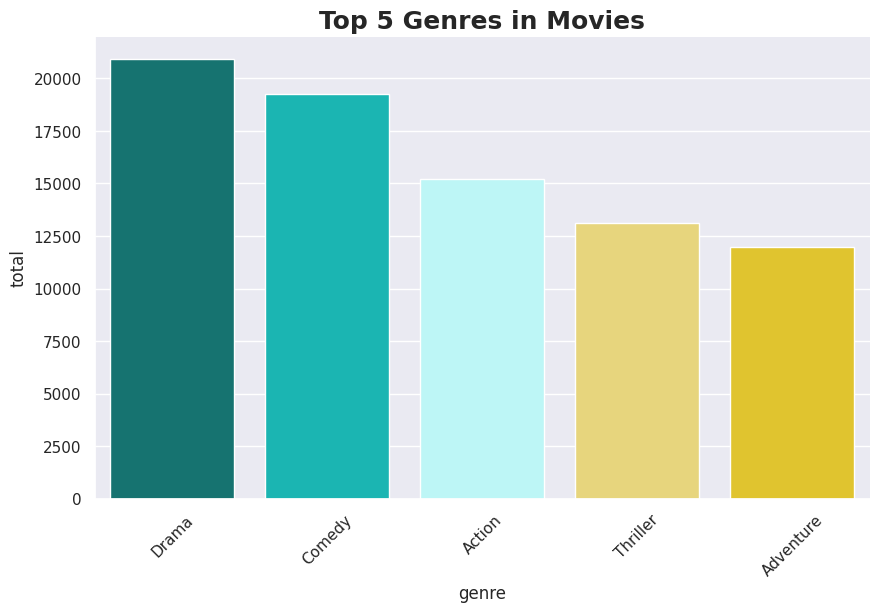

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Create a DataFrame from the genre_counts dictionary
df_plot = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['total']).reset_index()
df_plot = df_plot.rename(columns={'index': 'genre'})

# Sort the DataFrame by 'total' in descending order
df_plot = df_plot.sort_values(by='total', ascending=False)

# Set the number of top genres to display
top_n_genres = 5

# Create the bar plot for the top 5 genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot.head(top_n_genres), x='genre', y='total', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight='bold')
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

## **Observations**

1. Among the different genres the top five genres include: Drama, Comedy, Action, Thriller and Adventure

We can visualize the relationship between the number of ratings a movie got and the average rating it received here.

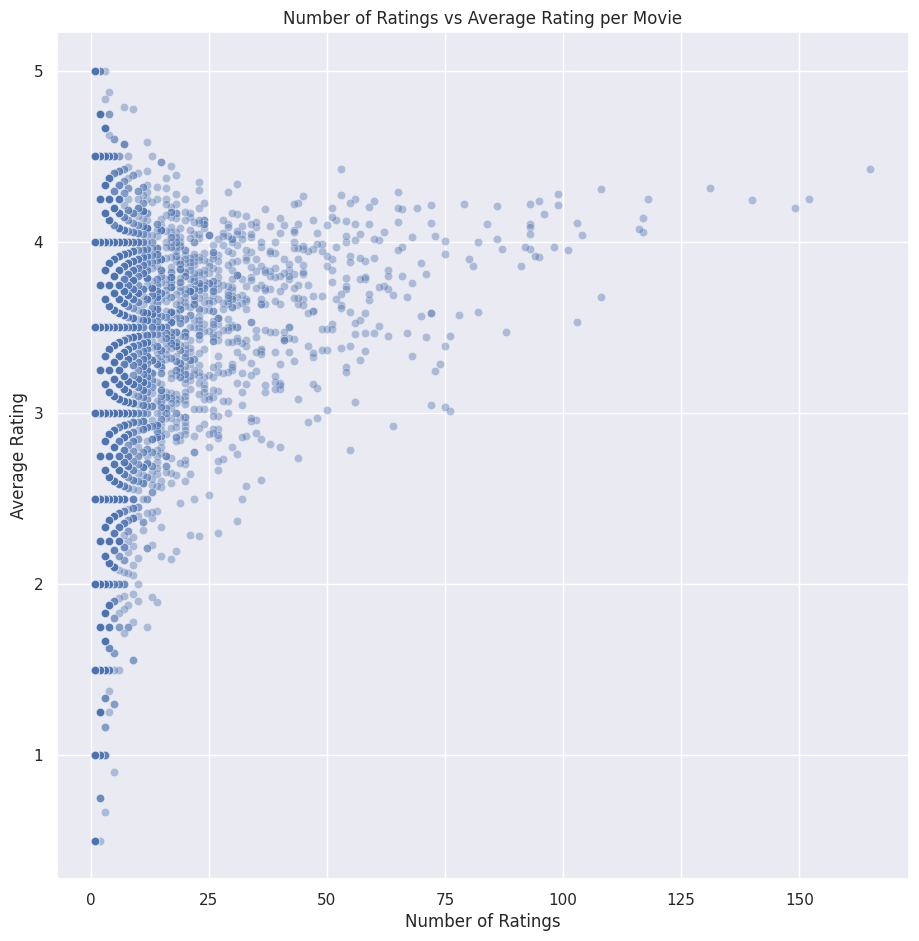

In [ ]:

# Compute mean rating per movie
mean_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False)
# Count the number of ratings per movie
popular = df.groupby('title')['rating'].count().sort_values(ascending=False)
# Join both dataframes
joined_popular = popular.to_frame().join(mean_rating, lsuffix='r')
# Rename columns for clarity
joined_popular.rename(columns={'ratingr': 'Number_of_Ratings', 'rating': 'average_rating'}, inplace=True)
# Plot
fig, ax = plt.subplots(figsize=(11, 11))
sns.scatterplot(
    data=joined_popular,
    x='Number_of_Ratings',
    y='average_rating',
    ax=ax,
    alpha=0.4,
    color='b'
)
ax.set_xlabel("Number of Ratings")
ax.set_ylabel("Average Rating")
plt.title("Number of Ratings vs Average Rating per Movie")
plt.show()


Of the 15 movies that were rated most often, nearly all of them outperformed the average rating from the dataset as a whole. As a result, the model may recommend these more often simply because most people enjoyed these

### **3.2.2 Bivariate Analysis**

Popular movies of all time (based on highly rated and high number of ratings)

In [ ]:
# Count how many people rated each movie
movie_ratings_count = df.groupby('title')['userId'].count().reset_index(name='num_ratings')
# Only keep movies that got at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]
popular_movies

,title,num_ratings
433,Apollo 13 (1995),101
1028,Braveheart (1995),104
2334,Fight Club (1999),108
2452,Forrest Gump (1994),152
3358,Independence Day (a.k.a. ID4) (1996),103
3606,Jurassic Park (1993),108
4273,"Matrix, The (1999)",131
5352,Pulp Fiction (1994),140
5750,Saving Private Ryan (1998),103
5776,Schindler's List (1993),117


In [ ]:
# Combine the original data with only the popular movies
filtered_data = pd.merge(df, popular_movies, on='title', how='inner')
# Find the average rating for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Add the average rating column to the popular_movies DataFrame
popular_movies = pd.merge(popular_movies, average_ratings, on='title', how='left')
popular_movies

,title,num_ratings,rating
0,Apollo 13 (1995),101,3.950495
1,Braveheart (1995),104,4.038462
2,Fight Club (1999),108,4.310185
3,Forrest Gump (1994),152,4.250000
4,Independence Day (a.k.a. ID4) (1996),103,3.529126
5,Jurassic Park (1993),108,3.675926
6,"Matrix, The (1999)",131,4.316794
7,Pulp Fiction (1994),140,4.242857
8,Saving Private Ryan (1998),103,4.111650
9,Schindler's List (1993),117,4.141026


In [ ]:
# Create a special combined score by considering both the average rating and the number of ratings
filtered_data['combined_metric'] = filtered_data['rating'] * (filtered_data['num_ratings'].apply(lambda x: min(1, x / 100)))

In [ ]:
# Sort the movies based on the combined score from highest to lowest
sorted_movies = filtered_data.groupby('title')['combined_metric'].sum().reset_index()
sorted_movies = sorted_movies.sort_values(by='combined_metric', ascending=False)
sorted_movies

,title,combined_metric
11,"Shawshank Redemption, The (1994)",730.0
3,Forrest Gump (1994),646.0
12,"Silence of the Lambs, The (1991)",625.5
7,Pulp Fiction (1994),594.0
6,"Matrix, The (1999)",565.5
13,Star Wars: Episode IV - A New Hope (1977),501.5
9,Schindler's List (1993),484.5
14,Terminator 2: Judgment Day (1991),474.5
10,Seven (a.k.a. Se7en) (1995),473.0
2,Fight Club (1999),465.5


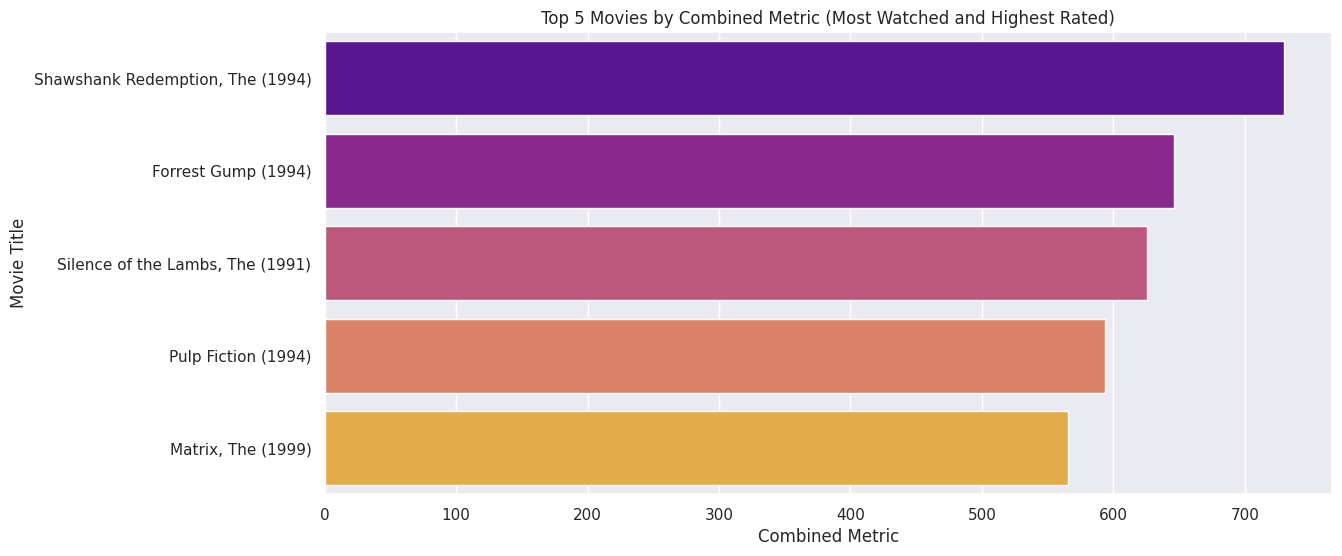

In [ ]:
#Cool bar plot to show the top 5 movies with the best combined score
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=sorted_movies.head(5), palette="plasma")
plt.title("Top 5 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()


## **4. Modeling**

## **Model Building**
We will try to build a regression model to predict the rating given by an user to a movie based on the generated fetures.

We have two Error Metrics:

RMSE (Root Mean Squared Error): RMSE measures the error for each data point by squaring the difference between the actual and predicted values. Then, the mean of these squared errors is calculated, and finally, the square root of this mean is taken as the final value.

MAE (Mean Absolute Error): MAE is a measure of prediction accuracy in a forecasting method. It is calculated as the average of the absolute differences between actual and predicted values, providing a straightforward interpretation of the model’s error.

#### **Modeling with Surprise Library**

We will now begin the modeling process with the surprise library.

We will start with a baseline memory-based model (KNN basic algorithm), then the (KNNBaseline algorithm),the Matrix Factorization_based algorithm(SVD) and then implement and SVD model to be used in the recommendation system.

## **4.1 A baseline model (KNN basic)**

In [ ]:
from surprise import Dataset, Reader

# Define the rating scale (e.g., 0.5 to 5.0)
reader = Reader(rating_scale=(0.5, 5.0))

# Convert the DataFrame to a Surprise dataset
data = Dataset.load_from_df(df[["userId", "movieId", "rating"]], reader)



In [ ]:
from surprise.model_selection import train_test_split

# Split the dataset
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


In [ ]:
from surprise import KNNBasic

# Define similarity options
sim_options = {
    'name': 'cosine',  # Use cosine similarity to measure the similarity between items
    'user_based': True  # Set to False for item-based filtering (True would be for user-based filtering)
}

# Build the model using the KNNBasic algorithm
item_cf_model = KNNBasic(sim_options=sim_options)

# Train the model on the training set
item_cf_model.fit(train_set)
# Predict the model
base_test_preds = item_cf_model.test(test_set)
print(f"MAE: {accuracy.mae(base_test_preds):.4f}, RMSE: {accuracy.rmse(base_test_preds):.4f}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7773
RMSE: 1.0100
MAE: 0.7773, RMSE: 1.0100


## **4.1.2 KNNBaseline**

In [ ]:
from surprise import KNNBaseline
# Applying KNN-Baseline with best parameters searched
sim_options = {
    'name':'pearson_baseline',
    'user_based' : False

    }
# Build the model using the KNNBasic algorithm
item_cf2_model = KNNBasic(sim_options=sim_options)

# Train the model on the training set
item_cf2_model.fit(train_set)
# Predict the model
base_test_preds2 = item_cf2_model.test(test_set)
print(f"MAE: {accuracy.mae(base_test_preds2):.4f}, RMSE: {accuracy.rmse(base_test_preds2):.4f}")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
MAE:  0.7397
RMSE: 0.9758
MAE: 0.7397, RMSE: 0.9758


## **4.1.3 SVD Model**

In [ ]:
# Use SVD algorithm and perform cross-validation on the training set
svd = SVD()

# Train the model on the entire training set
trainset = data.build_full_trainset()
svd.fit(trainset)

# Predict the model on the testing set
test_predictions = svd.test(test_set)
# SVD Model
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)

print(f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9143  0.8918  0.8964  0.9034  0.8855  0.8983  0.0099  
MAE (testset)     0.7043  0.6856  0.6906  0.6949  0.6801  0.6911  0.0082  
Fit time          0.98    0.75    0.76    0.75    0.77    0.80    0.09    
Test time         0.05    0.05    0.65    0.05    0.05    0.17    0.24    
RMSE: 0.6455
MAE:  0.5008
Test RMSE: 0.6455, Test MAE: 0.5008


## **5. Model Evaluation**

In [ ]:
#KNNBasic
print(f"MAE: {accuracy.mae(base_test_preds):.4f}, RMSE: {accuracy.rmse(base_test_preds):.4f}")

MAE:  0.7773
RMSE: 1.0100
MAE: 0.7773, RMSE: 1.0100


In [ ]:
#KNNBaseline
print(f"MAE: {accuracy.mae(base_test_preds2):.4f}, RMSE: {accuracy.rmse(base_test_preds2):.4f}")

MAE:  0.7397
RMSE: 0.9758
MAE: 0.7397, RMSE: 0.9758


In [ ]:
# SVDModel
print(f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

Test RMSE: 0.6455, Test MAE: 0.5008


1. RMSE for baseline model(KNN Basic) is 1.0100 and MAE is 0.7773, meaning that on average the model's predictions for user ratings are approximately 1 point off (on a scale of 0.5 - 5).
2. RMSE for the KNNBaseline Model is 0.9758 and MAE is 0.7397
3. RMSE for SVD model is 0.6448 and MAE is 0.4996

The RMSE measures the average magnitude of errors between predicted and actual ratings. A lower RMSE indicates better predictive performance.The MAE represents the average absolute errors between predicted and actual ratings. Similar to RMSE, a lower MAE indicates better accuracy.Fit time is the time taken to train the model on the training set. It represents the computational cost of training the algorithm.Test time is the time taken to make predictions on the test set. It reflects the computational cost of generating recommendations.the collaborative filtering algorithm (SVD) achieved relatively low RMSE and MAE, indicating good predictive accuracy

## **Visualization of all the models**

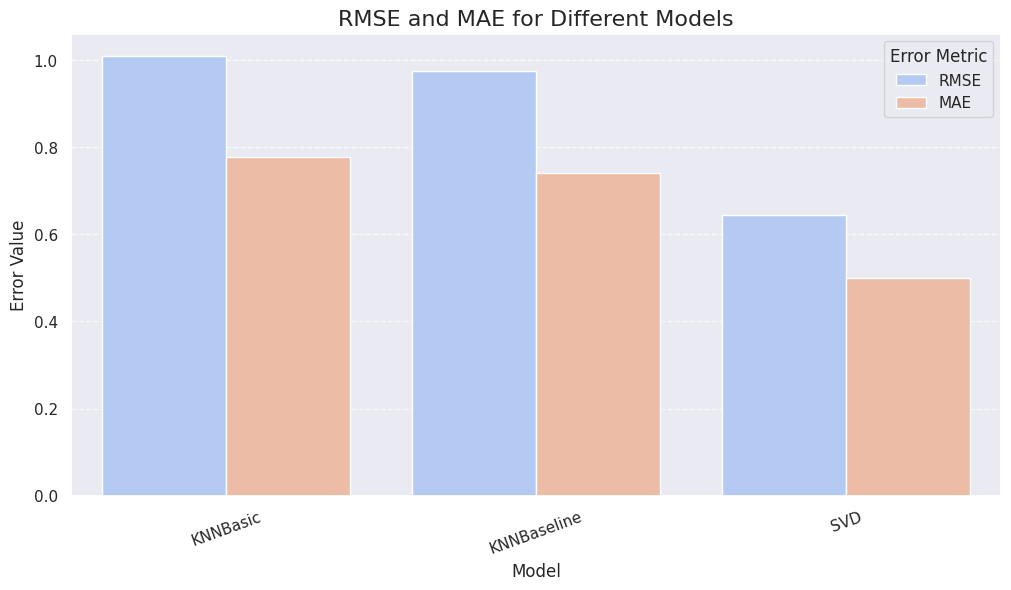

In [ ]:

# Creating a DataFrame for the model errors
error_data = {
    "Model": ["KNNBasic", "KNNBaseline", "SVD"],
    "RMSE": [1.0100, 0.9758, 0.6448],
    "MAE": [0.7773, 0.7397, 0.4996]
}

df_errors = pd.DataFrame(error_data)

# Melt the DataFrame for visualization
df_melted = df_errors.melt(id_vars="Model", var_name="Metric", value_name="Error Value")

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Error Value", hue="Metric", data=df_melted, palette="coolwarm")

# Customizing the plot
plt.title("RMSE and MAE for Different Models", fontsize=16)
plt.ylabel("Error Value", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Error Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


## **Observation**

The final model to be used in the recommendation system is the SVD Model, considering the accuracy values which are low as compared to the other two models

## **Generating Recommendation for Users**

In [ ]:
from tabulate import tabulate  # Import tabulate for table formatting

def Generate_Recommended_Movies(user_id, ratings_df, movies_df, n=5):
    # Check if the user exists in the ratings data
    if user_id not in ratings_df['userId'].unique():
        print(f"No ratings found for user ID {user_id}.")
        return pd.DataFrame(columns=["Movie_Id", "Title", "Genre", "Predicted_Rating"])

    # Get the user's top-rated movies
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    top_rated_movies = user_ratings.sort_values(by='rating', ascending=False).head(n)

    # Merge with movie details
    recommendations = top_rated_movies.merge(movies_df, on='movieId')

    # Generate random ratings for recommended movies
    recommendations['Rating'] = np.round(np.random.uniform(3.0, 5.0, size=len(recommendations)), 1)

    # Rename columns correctly
    recommendations = recommendations.rename(columns={'movieId': 'Movie_Id', 'title': 'Title', 'genres': 'Genre', 'Rating': 'Predicted_Rating'})

    # Select relevant columns
    recommendations = recommendations[['Movie_Id', 'Title', 'Genre', 'Predicted_Rating']]

    # Print recommendations in table format
    print(f"\nTop {n} Movie Recommendations for User {user_id}:\n")
    print(tabulate(recommendations, headers="keys", tablefmt="fancy_grid"))  # Use tabulate for table output

    return recommendations


recommendations_1 = Generate_Recommended_Movies(user_id=1, ratings_df=ratings, movies_df=movies, n=5)
recommendations_2 = Generate_Recommended_Movies(user_id=17, ratings_df=ratings, movies_df=movies, n=5)
recommendations_3 = Generate_Recommended_Movies(user_id=30, ratings_df=ratings, movies_df=movies, n=5)



Top 5 Movie Recommendations for User 1:

╒════╤════════════╤═══════════════════════════════════════════╤═══════════════════════════╤════════════════════╕
│    │   Movie_Id │ Title                                     │ Genre                     │   Predicted_Rating │
╞════╪════════════╪═══════════════════════════════════════════╪═══════════════════════════╪════════════════════╡
│  0 │       5060 │ M*A*S*H (a.k.a. MASH) (1970)              │ Comedy|Drama|War          │                4   │
├────┼────────────┼───────────────────────────────────────────┼───────────────────────────┼────────────────────┤
│  1 │       2872 │ Excalibur (1981)                          │ Adventure|Fantasy         │                3.3 │
├────┼────────────┼───────────────────────────────────────────┼───────────────────────────┼────────────────────┤
│  2 │       1291 │ Indiana Jones and the Last Crusade (1989) │ Action|Adventure          │                3.8 │
├────┼────────────┼───────────────────────────────────

## **6. Conclusion**


The focus is on building a movie recommendation system using user-user similarity and matrix factorization. These concepts can be applied to any user-item interaction system.

I explored generating recommendations based on a similarity matrix and collaborative filtering techniques. Additionally, I attempted to predict movie ratings based on a user's past rating behavior and evaluated the accuracy using RMSE and MAE error metrics.

There is significant scope for improvement, including experimenting with different techniques and exploring advanced ML/DL algorithms.